In [69]:
#importing python libraries
import math
import pandas as pd
import numpy as np
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential,load_model
from keras.layers import LSTM,Dropout,Dense
import matplotlib.pyplot as plt

In [70]:
#loading stock data from yahoo finance
df=pdd.DataReader('AAPL',data_source='yahoo',start='2016-01-01',end='2021-10-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.199892
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.220579
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.613626
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.151514
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.174419
...,...,...,...,...,...,...
2021-10-25,149.369995,147.619995,148.679993,148.639999,50720600.0,148.234528
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,148.912674
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.443954


<function matplotlib.pyplot.show(close=None, block=None)>

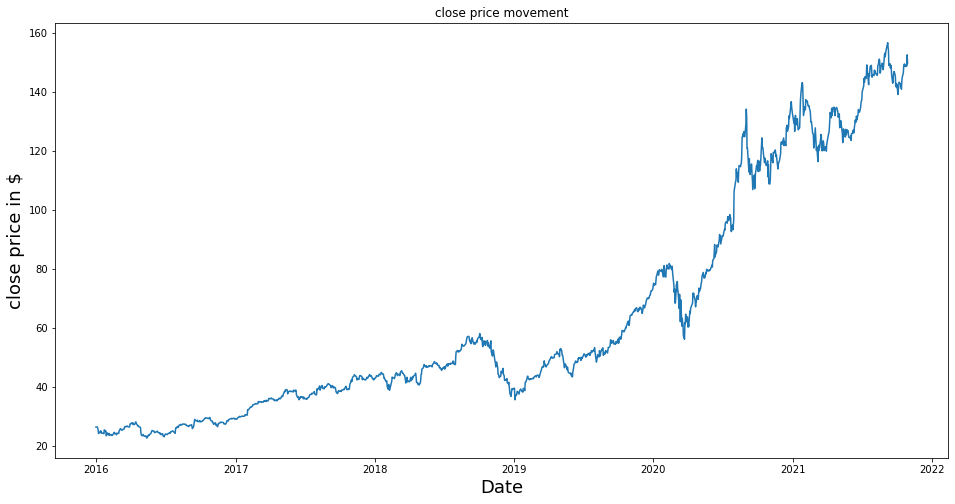

In [71]:
#visualizing the data
plt.figure(figsize=(16,8))
plt.title('close price movement')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in $',fontsize=18)
plt.show

In [72]:
#listing columns
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

<AxesSubplot:ylabel='Frequency'>

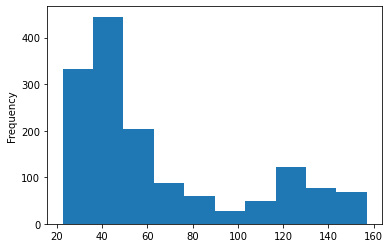

In [73]:
#histogram for open price of stock
df.Open.plot.hist()

<AxesSubplot:ylabel='Frequency'>

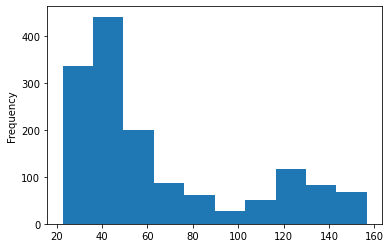

In [74]:
#histogram for closing price of stock
df.Close.plot.hist()

<AxesSubplot:ylabel='Frequency'>

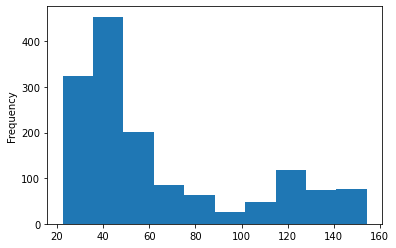

In [75]:
#histogram for lowest price
df.Low.plot.hist()

<AxesSubplot:ylabel='Frequency'>

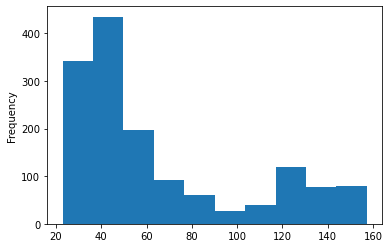

In [76]:
#histogram for highest price
df.High.plot.hist()

In [77]:
#mean of the data
np.mean(df.Open)

63.70215462567126

In [78]:
#median of the data
np.median(df.Close)

47.599998474121094

In [79]:
#describing data
df.describe(include="all")

,High,Low,Open,Close,Volume,Adj Close
count,1469.000000,1469.000000,1469.000000,1469.000000,1.469000e+03,1469.000000
mean,64.377914,63.046601,63.702155,63.744911,1.273564e+08,62.349046
std,38.734627,37.808086,38.292589,38.290529,5.990780e+07,38.698951
min,22.917500,22.367500,22.500000,22.584999,4.544800e+07,21.009533
25%,37.555000,36.709999,37.174999,37.244999,8.756040e+07,35.447853
50%,47.967499,47.267502,47.507500,47.599998,1.109348e+08,45.968616
75%,80.974998,79.552498,80.232498,80.362503,1.481588e+08,79.085510
max,157.259995,154.389999,156.979996,156.690002,5.334788e+08,156.262573


In [80]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2015-12-31 to 2021-10-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1469 non-null   float64
 1   Low        1469 non-null   float64
 2   Open       1469 non-null   float64
 3   Close      1469 non-null   float64
 4   Volume     1469 non-null   float64
 5   Adj Close  1469 non-null   float64
dtypes: float64(6)
memory usage: 80.3 KB


array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Adj Close'}>]], dtype=object)

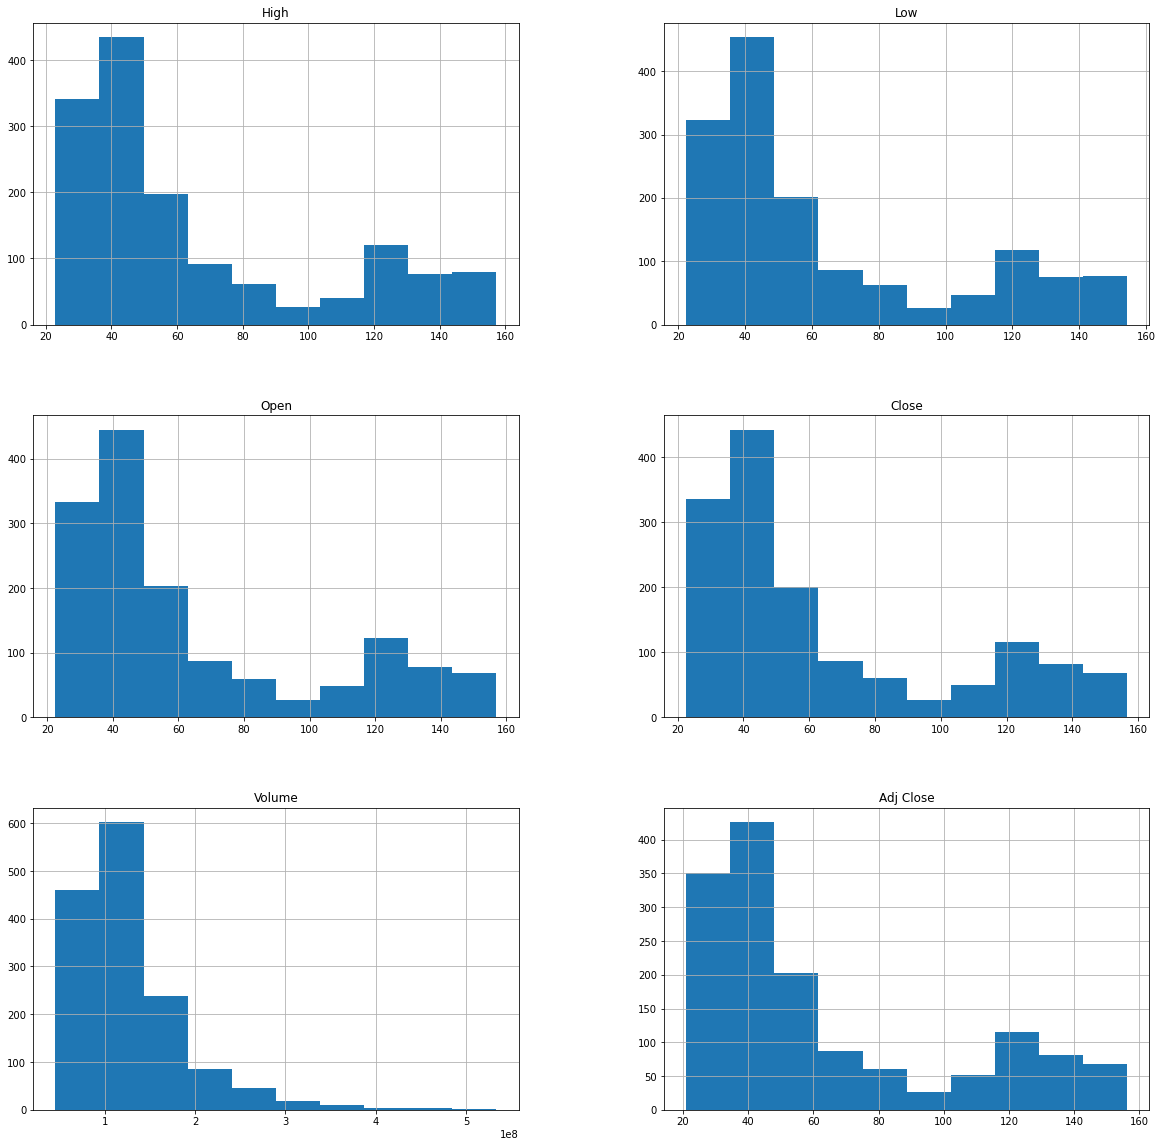

In [81]:
#representing all data in the form of histogram
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(20,20))

In [82]:
#correctig data
corr = df.corr()
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999702,0.999833,0.999788,-0.179141,0.999769
Low,0.999702,1.000000,0.999760,0.999793,-0.193566,0.999768
Open,0.999833,0.999760,1.000000,0.999597,-0.185247,0.999570
Close,0.999788,0.999793,0.999597,1.000000,-0.187007,0.999975
Volume,-0.179141,-0.193566,-0.185247,-0.187007,1.000000,-0.186512
Adj Close,0.999769,0.999768,0.999570,0.999975,-0.186512,1.000000


In [83]:
#reshaping data
df = df['Open'].values
df = df.reshape(-1, 1)

In [84]:
#splitting data for training and testing
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [85]:
#scaling data
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [86]:
#function to create dataset
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [87]:
#creating training and testing dataset
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [88]:
#reshaping dataset
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [89]:
#model building
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [90]:
#reshaping data for lstm
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [91]:
#compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [92]:
#saving the model and start training
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
36/36 [==============================] - 9s 102ms/step - loss: 0.0098
Epoch 2/50
36/36 [==============================] - 4s 103ms/step - loss: 0.0018
Epoch 3/50
36/36 [==============================] - 4s 103ms/step - loss: 0.0017
Epoch 4/50
36/36 [==============================] - 4s 103ms/step - loss: 0.0016
Epoch 5/50
36/36 [==============================] - 4s 105ms/step - loss: 0.0011
Epoch 6/50
36/36 [==============================] - 4s 116ms/step - loss: 0.0015
Epoch 7/50
36/36 [==============================] - 4s 114ms/step - loss: 0.0013
Epoch 8/50
36/36 [==============================] - 4s 120ms/step - loss: 0.0015
Epoch 9/50
36/36 [==============================] - 4s 125ms/step - loss: 0.0013
Epoch 10/50
36/36 [==============================] - 4s 121ms/step - loss: 0.0014
Epoch 11/50
36/36 [==============================] - 4s 115ms/step - loss: 9.8450e-04
Epoch 12/50
36/36 [==============================] - 4s 117ms/step - loss: 9.7418e-04
Epoch 13/50
36/36

In [93]:
#loading the model
model = load_model('stock_prediction.h5')

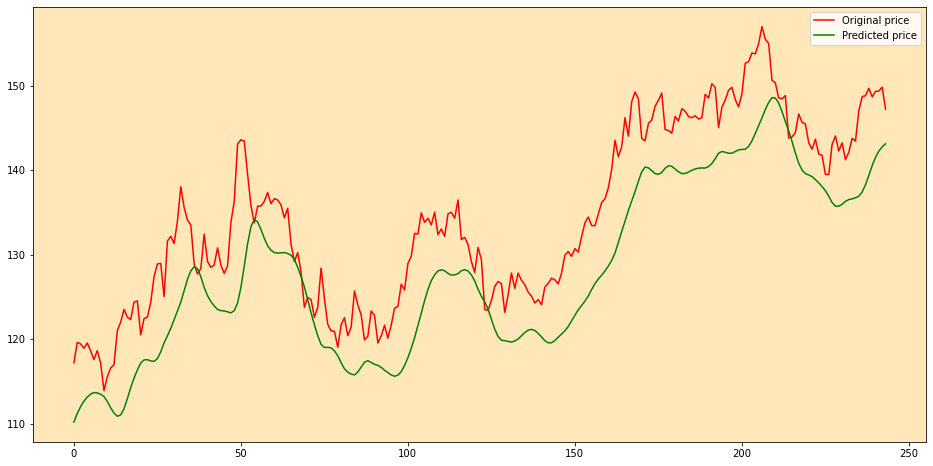

In [94]:
#visualizing the result
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#FFE7BA')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='green', label='Predicted price')
plt.legend()